In [1]:
pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 48.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 63.3 MB/s eta 0:00:00:00:01
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=bb04ba3b8c7afd3a283d5fe780223387f93848dfb3198190b2e1a2d1b670abb4
  Stored in directory: /home/codespace/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-feym2fe5/detectron2_beb244b46d474169970b419326332e33
  Running 

In [2]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

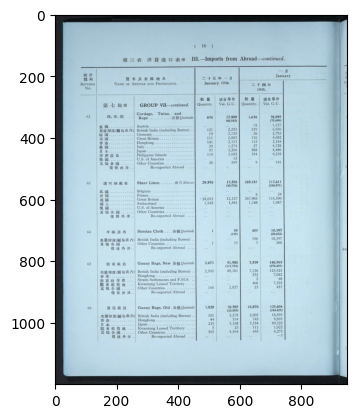

In [4]:
image = cv2.imread('/workspaces/eastd143b-ocr/data/images/table_01.png')
plt.imshow(image)

In [5]:
model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_50_FPN_3x/config', label_map = {0: 'Table', 1: 'Figure'})

config.yaml?dl=1: 8.19kB [00:00, 9.48kB/s]
model_final.pth?dl=1: 330MB [00:10, 32.4MB/s]                               
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [6]:
layout = model.detect(image)

/home/codespace/.python/current/lib/python3.10/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/codespace/.python/current/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
image2 = cv2.read('/workspaces/eastd143b-ocr/data/images/2r_2l_01.jpg')

AttributeError: module 'cv2' has no attribute 'read'

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng+chi_tra')

In [ ]:
res = text = ocr_agent.detect(image, return_response=True)

In [ ]:
print(res)

In [ ]:
layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.WORD)

In [ ]:
lp.draw_text(image, layout, show_bbox=True)